# EMOTION DETECTOR

**Importing Libraries**


In [4]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation,MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version", tf.__version__)

Tensorflow version 2.12.0


**Exploring Datasets**


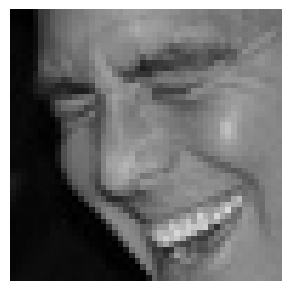

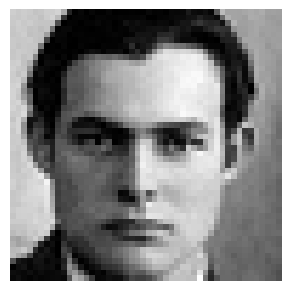

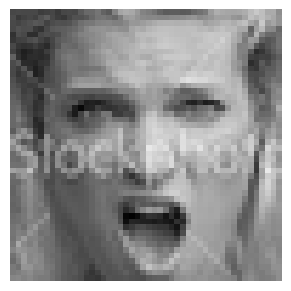

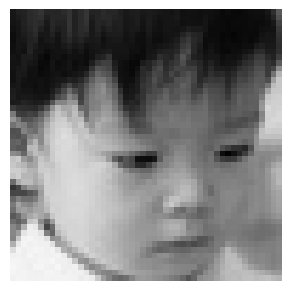

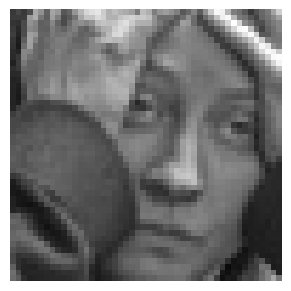

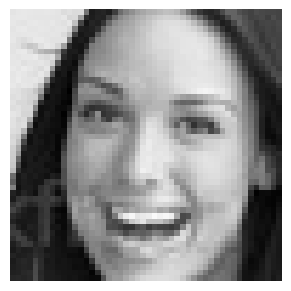

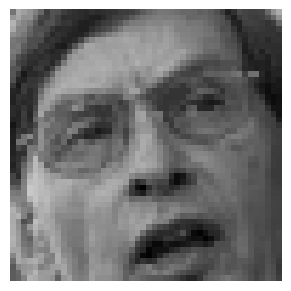

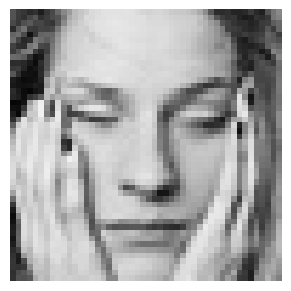

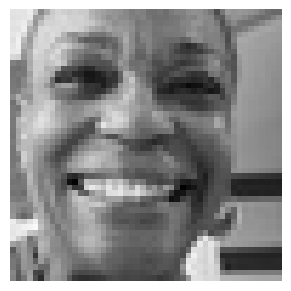

In [5]:
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

**Preparing Data for Training**

In [6]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                    target_size = (img_size,img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode ="categorical",
                                                    shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                    target_size = (img_size,img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode ="categorical",
                                                    shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**Defining Model**

In [7]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
        
    return x
    

In [8]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [9]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(inputs,64,(5,5))
    conv_3 = Convolution(inputs,128,(3,3))
    
    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)
    
    output = Dense(7,activation = "softmax")(dense_1)
    model = Model(inputs = [inputs], outputs = [output])
    
    model.compile(loss = ["categorical_crossentropy"],optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [10]:
model = model_fer((48,48,1))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_2 (Batc  (None, 48, 48, 128)      512       
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 24, 24, 128)       0     

**Initializing the Model**

In [11]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weight.h5", monitor ='val_accuracy', save_weights_only = True, mode = 'max', 
                            verbose =1)
callbacks = [checkpoint]

**Training the Model**

**The next cell takes time to complete**

In [12]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/15


2023-07-13 21:30:23.727171: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-07-13 21:30:23.754509: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


448/448 [==============================] - ETA: 0s - loss: 1.6352 - accuracy: 0.3796

2023-07-13 21:31:29.296733: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



Epoch 1: saving model to model_weight.h5
448/448 [==============================] - 69s 154ms/step - loss: 1.6352 - accuracy: 0.3796 - val_loss: 1.6530 - val_accuracy: 0.3504
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.3416 - accuracy: 0.4922
Epoch 2: saving model to model_weight.h5
448/448 [==============================] - 72s 161ms/step - loss: 1.3416 - accuracy: 0.4922 - val_loss: 1.9495 - val_accuracy: 0.2480
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.1754 - accuracy: 0.5608
Epoch 3: saving model to model_weight.h5
448/448 [==============================] - 67s 150ms/step - loss: 1.1754 - accuracy: 0.5608 - val_loss: 1.5387 - val_accuracy: 0.4042
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 1.0450 - accuracy: 0.6131
Epoch 4: saving model to model_weight.h5
448/448 [==============================] - 66s 148ms/step - loss: 1.0450 - accuracy: 0.6131 - val_loss: 1.6658 - val_accuracy: 0.3878
Epoch 5/15


**Model Evaluation**


In [13]:
model.evaluate(validation_generator)

  5/113 [>.............................] - ETA: 3s - loss: 1.9648 - accuracy: 0.5250

2023-07-13 21:48:48.429835: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


113/113 [==============================] - 4s 31ms/step - loss: 1.9585 - accuracy: 0.4926


[1.9584925174713135, 0.49261632561683655]

**Plotting Loss**

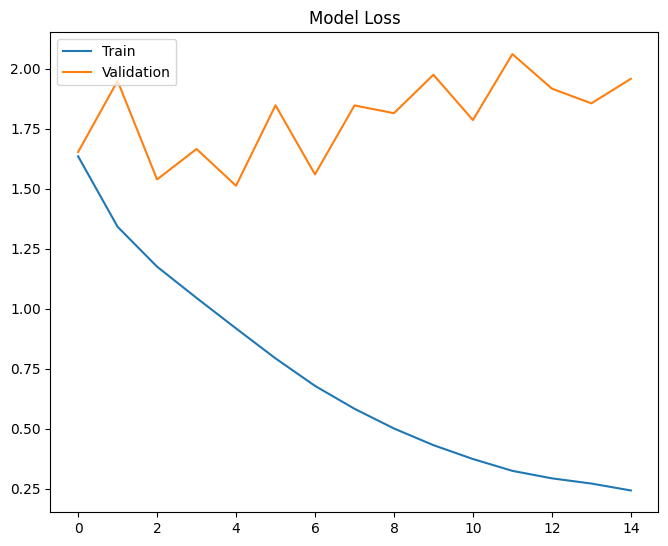

In [25]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model Loss')
plt.legend(['Train', 'Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right =0.95, left=0.0, wspace=0.35, hspace=0.25)

**Plotting Accuracy**

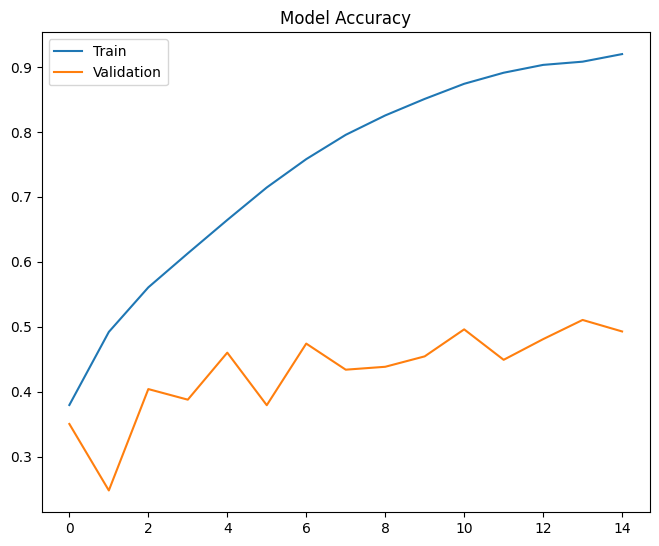

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, wspace=0.35, hspace=0.25)



**Saving Model**


In [27]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)
